# Minimum description length

Let it be the case that some data can be generated by either one normal distribution or as a mixture model of two normal distributions (also known as a Gaussian Mixture Model). In both cases, the data of length $N$ is assumed to be independent and identically distributed (IID).

The probability of a value $x_i$ being drawn from a normal distribution with mean $\mu$ and standard deviation $\sigma$ is given by

$$
p(x_i | \mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} \exp \Big( - \frac{(x - \mu)^2}{2 \sigma^2}  \Big).
$$

The log probability is given by

$$
\begin{align*}
\log p(x_i | \mu, \sigma) &= \log \frac{1}{\sigma \sqrt{2 \pi}} - \frac{(x - \mu)^2}{2 \sigma^2} \\
 &= - \log \sigma \sqrt{2 \pi} - \frac{(x - \mu)^2}{2 \sigma^2}. \\
\end{align*}
$$

A uniform distribution will be used for the priors for the mean and standard deviation.

$$
\mu \sim \text{Uniform}(a,b)
$$

where $a < b$. The probability density function $p(\mu)$ can be written

$$
p(\mu) = 
\begin{cases}
 \frac{1}{b-a} & a \leq \mu \leq b \\
 0             & \text{otherwise} \\
\end{cases}
$$

The log of the PDF of the uniform distribution $p(\mu)$ is given by

$$
\begin{align*}
\ln p(\mu) &= \ln \frac{1}{b-a} \\
               &= - \ln (b-a) \\
\end{align*}
$$

for $a < b$. 

## Single normal distribution

In the case of a single normal distribution

$$
p(x|\mu, \sigma) = \prod_{i=0}^{N-1} p(x_i | \mu, \sigma).
$$

The posterior probability of the parameters $\mu$ and $\sigma$ given the data $x$ is given by

$$
p(\mu, \sigma | x) = \frac{p(x, \mu, \sigma)}{p(x)} = \frac{p(x | \mu, \sigma) p(\mu) p(\sigma)}{p(x)}.
$$

The joint probability $p(x, \mu, \sigma)$ can be written as

$$
p(x, \mu, \sigma) = \Big( \prod_{i=0}^{N-1} p(x_i | \mu, \sigma) \Big) p(\mu) p(\sigma).
$$

The prior for the mean $\mu$ is a uniform distribution such that

$$
\mu \sim \text{Uniform}(\mu_{min}, \mu_{max})
$$

and the prior for the standard deviation $\sigma$ is also a uniform distribution

$$
\sigma \sim \text{Uniform}(\sigma_{min}, \sigma_{max}).
$$

The log of the joint probability is given by

$$
\begin{align*}
\log p(x, \mu, \sigma) &= \log \left[ \Big( \prod_{i=0}^{N-1} p(x_i | \mu, \sigma) \Big) p(\mu) p(\sigma) \right] \\
 &= \sum_{i=0}^{N-1} \log p(x_i | \mu, \sigma) + \log p(\mu) + \log p(\sigma) \\
 &= \sum_{i=0}^{N-1} \Big( - \log \sigma \sqrt{2 \pi} - \frac{(x_i - \mu)^2}{2 \sigma^2} \Big) - \log (\mu_{max} - \mu_{min}) - \log (\sigma_{max} - \sigma_{min}) \\
 &= - N \log \sigma \sqrt{2 \pi} - \frac{1}{2 \sigma^2} \sum_{i=0}^{N-1} (x_i - \mu)^2 - \log (\mu_{max} - \mu_{min}) - \log (\sigma_{max} - \sigma_{min}) \\
\end{align*}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def log_likelihood_one_normal(x, mu, sigma):
    N = len(x)
    return -N * np.log(sigma * np.sqrt(2 * np.pi)) - \
        (1/(2 * np.pow(sigma,2))) * np.sum(np.pow(x - mu, 2))

In [3]:
def log_joint_probability_one_normal(x, mu, sigma, mu_min, mu_max, sigma_min, sigma_max):
    N = len(x)
    return -N * np.log(sigma * np.sqrt(2 * np.pi)) - \
        (1/(2 * np.pow(sigma,2))) * np.sum(np.pow(x - mu, 2)) - \
        np.log(mu_max - mu_min) - \
        np.log(sigma_max - sigma_min)

## Mixture model of two normal distributions

There are two normal distributions parameterised by $(\mu_0, \sigma_0)$ and $(\mu_1, \sigma_1)$.

A Bernoulli distribution determines which of the normal distribution is selected for a sample $x_i$.

The probability density function for the mixture model for a single value $x_i$ is given by

$$
p(x_i | \theta, \mu_0, \sigma_0, \mu_1, \sigma_1) = (1 - \theta) p(x_i | \mu_0, \sigma_0) + \theta p(x_i | \mu_1, \sigma_1).
$$

The probability of the $N$ values is therefore

$$
p(x | \theta, \mu_0, \sigma_0, \mu_1, \sigma_1) = \prod_{i=0}^{N-1} \left[ (1 - \theta) p(x_i | \mu_0, \sigma_0) + \theta p(x_i | \mu_1, \sigma_1) \right].
$$

The joint probability is given by

$$
p(x, \theta, \mu_0, \sigma_0, \mu_1, \sigma_1) = \prod_{i=0}^{N-1} \left[ (1 - \theta) p(x_i | \mu_0, \sigma_0) + \theta p(x_i | \mu_1, \sigma_1) \right] p(\theta) p(\mu_0) p(\sigma_0) p(\mu_1) p(\sigma_1).
$$

The log of the joint probability is given by

$$
\begin{align*}
\log p(x_i, \theta, \mu_0, \sigma_0, \mu_1, \sigma_1) &= \sum_{i=0}^{N-1} \log \left[ (1 - \theta) p(x_i | \mu_0, \sigma_0) + \theta p(x_i | \mu_1, \sigma_1) \right] + \log p(\theta) + \log p(\mu_0) + \log p(\sigma_0) + \log p(\mu_1) + \log  p(\sigma_1) \\
&= \sum_{i=0}^{N-1} \log \left[ (1 - \theta) p(x_i | \mu_0, \sigma_0) + \theta p(x_i | \mu_1, \sigma_1) \right] - \log (\theta_{max} - \theta_{min}) - 2 \log (\mu_{max} - \mu_{min}) - 2 \log (\sigma_{max} - \sigma_{min})
\end{align*}
$$

In [4]:
def p_normal(x, mu, sigma):
    """Probability of value x from a normal distribution."""
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp( -np.pow(x - mu, 2) / (2 * np.pow(sigma, 2)) )

In [5]:
def p_two_normals(x, theta, mu0, sigma0, mu1, sigma1):
    return (1-theta) * p_normal(x, mu0, sigma0) + theta * p_normal(x, mu1, sigma1)

In [6]:
def log_likelihood_two_normals(x, mu, sigma, theta):
    return np.sum( np.log( (1-theta) * p_normal(x, mu[0], sigma[0]) + theta * p_normal(x, mu[1], sigma[1]) ) )

In [7]:
def log_joint_probability_two_normals(x, mu, sigma, theta, mu_max, mu_min, sigma_max, sigma_min, theta_min, theta_max):
    assert len(mu) == 2
    # assert mu_min <= mu[0] <= mu_max, f"mu[0] = {mu[0]}"
    # assert mu_min <= mu[1] <= mu_max, f"mu[1] = {mu[1]}"
    assert len(sigma) == 2
    # assert sigma_min <= sigma[0] <= sigma_max, f"sigma[0] = {sigma[0]}"
    # assert sigma_min <= sigma[1] <= sigma_max, f"sigma[1] = {sigma[1]}"
    # assert theta_min <= theta <= theta_max, f"theta = {theta}"

    # Log-likelihood
    ll = np.sum( np.log( (1-theta) * p_normal(x, mu[0], sigma[0]) + theta * p_normal(x, mu[1], sigma[1]) ) )

    return ll - np.log(theta_max - theta_min) - 2 * np.log(mu_max - mu_min) - 2 * np.log(sigma_max - sigma_min)

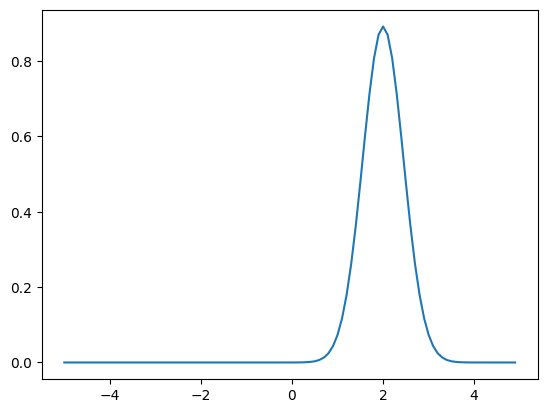

In [8]:
x = np.arange(-5, 5, 0.1)
y = p_normal(x, 2, np.sqrt(0.2))

plt.plot(x, y)
plt.show()

## Self-information

Self-information is measured as

$$
I(p_i) = - \log_2(p_i)
$$

for a probability $p_i$. The self-information is plotted below.

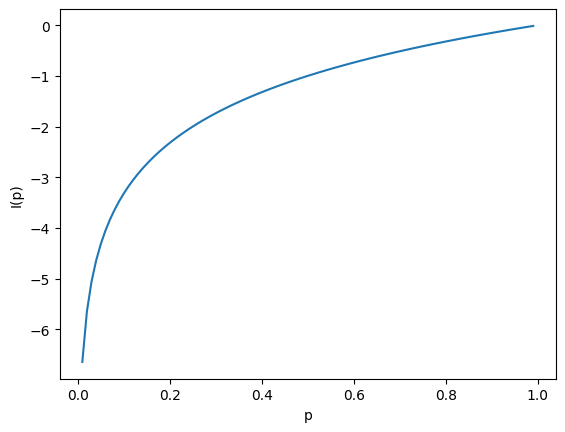

In [9]:
p = np.arange(0.01, 1, 0.01)
self_information = np.log2(p)

plt.plot(p, self_information)
plt.xlabel('p')
plt.ylabel('I(p)')
plt.show()

## MDL experiment

In [10]:
from sklearn.mixture import GaussianMixture

In [11]:
def fit_one_normal_distribution(x):
    return {
        "mu": np.mean(x),
        "sigma": np.std(x)
    }

In [12]:
def fit_two_normal_distributions(x):
    gm = GaussianMixture(n_components=2).fit(x.reshape(-1, 1))
    
    return {
        "mu_0": gm.means_[0][0],
        "sigma_0": np.sqrt(gm.covariances_[0][0]),
        "mu_1": gm.means_[1][0],
        "sigma_1": np.sqrt(gm.covariances_[1][0]),
        "theta": gm.weights_[1]
    }

In [13]:
def generate_data_one_normal_distribution(N):
    params = {
        "mu": np.random.uniform(0, 10),
        "sigma": np.random.uniform(0.1, 1)
    }

    return np.random.normal(loc=params['mu'], scale=params['sigma'], size=N), params

In [14]:
def generate_data_two_normal_distributions(N):
    params = {
        "mu_0": np.random.uniform(0, 10),
        "sigma_0": np.random.uniform(0.1, 1),
        "mu_1": np.random.uniform(0, 10),
        "sigma_1": np.random.uniform(0.1, 1),
        "theta": np.random.uniform(0, 1)
    }

    n1 = np.random.normal(loc=params['mu_0'], scale=params['sigma_0'], size=N)
    n2 = np.random.normal(loc=params['mu_1'], scale=params['sigma_1'], size=N)

    pi = np.random.binomial(1, params['theta'], size=N)

    return (1 - pi) * n1 + pi * n2, params

In [15]:
mu_min = 0
mu_max = 10
sigma_min = 0.01
sigma_max = 1
theta_max = 1
theta_min = 0

def calc_joints(x):
    # Fit a single normal distribution
    fit1 = fit_one_normal_distribution(x)
    j1 = log_joint_probability_one_normal(x, fit1['mu'], fit1['sigma'], mu_min, mu_max, sigma_min, sigma_max)

    # Fit two normal distributions
    fit2 = fit_two_normal_distributions(x)
    mu = [fit2['mu_0'], fit2['mu_1']]
    sigma = [fit2['sigma_0'], fit2['sigma_1']]
    j2 = log_joint_probability_two_normals(x, mu, sigma, fit2['theta'], mu_max, mu_min, sigma_max, sigma_min, theta_min, theta_max)

    return fit1, np.exp(j1), fit2, np.exp(j2)

j1 = 2.0147260327298714e-09
j2 = 2.2483510974842395e-10


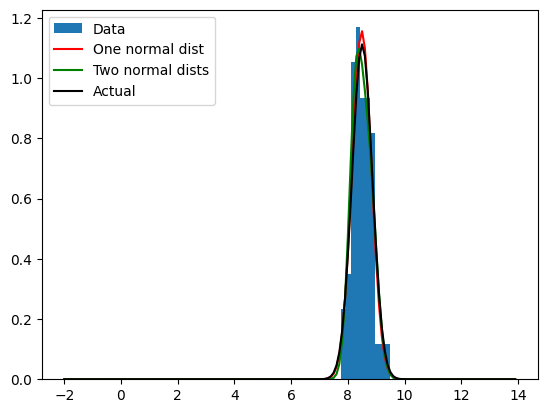

In [16]:
x, params = generate_data_one_normal_distribution(50)
fit1, j1, fit2, j2 = calc_joints(x)
print(f"j1 = {j1}")
print(f"j2 = {j2}")

x_values = np.arange(-2, 14, 0.1)
y_one_normal = p_normal(x_values, fit1['mu'], fit1['sigma'])
y_two_normals = p_two_normals(x_values, fit2['theta'], fit2['mu_0'], fit2['sigma_0'], fit2['mu_1'], fit2['sigma_1'])
y_actual = p_normal(x_values, params['mu'], params['sigma'])

plt.hist(x, density=True, label='Data')
plt.plot(x_values, y_one_normal, 'r', label='One normal dist')
plt.plot(x_values, y_two_normals, 'g', label='Two normal dists')
plt.plot(x_values, y_actual, 'k', label='Actual')
plt.legend()
plt.show()

j1 = 5.058844222050914e-125
j2 = 3.2395298074464507e-71


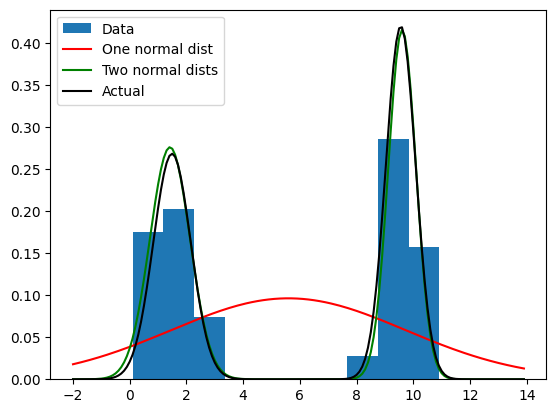

In [17]:
x, params = generate_data_two_normal_distributions(100)
fit1, j1, fit2, j2 = calc_joints(x)
print(f"j1 = {j1}")
print(f"j2 = {j2}")

x_values = np.arange(-2, 14, 0.1)
y_one_normal = p_normal(x_values, fit1['mu'], fit1['sigma'])
y_two_normals = p_two_normals(x_values, fit2['theta'], fit2['mu_0'], fit2['sigma_0'], fit2['mu_1'], fit2['sigma_1'])
y_actual = p_two_normals(x_values, params['theta'], params['mu_0'], params['sigma_0'], params['mu_1'], params['sigma_1'])

plt.hist(x, density=True, label='Data')
plt.plot(x_values, y_one_normal, 'r', label='One normal dist')
plt.plot(x_values, y_two_normals, 'g', label='Two normal dists')
plt.plot(x_values, y_actual, 'k', label='Actual')
plt.legend()
plt.show()

In [18]:
def aic(k, ll):
    """Calculate the Akaike Information Criterion."""
    return 2*k - 2*ll

In [19]:
def aic_one_normal(x, fit):
    ll = log_likelihood_one_normal(x, fit['mu'], fit['sigma'])
    return aic(2, ll)

In [20]:
def aic_two_normals(x, fit):
    mu = [fit['mu_0'], fit['mu_1']]
    sigma = [fit['sigma_0'], fit['sigma_1']]
    ll = log_likelihood_two_normals(x, mu, sigma, fit['theta'])
    return aic(5, ll)

In [21]:
def bic(k, n, ll):
    """Calculate the Bayesian Information Criterion."""
    return k * np.log(n) - 2 * ll

In [22]:
def bic_one_normal(x, fit):
    ll = log_likelihood_one_normal(x, fit['mu'], fit['sigma'])
    return bic(2, len(x), ll)

In [23]:
def bic_two_normals(x, fit):
    mu = [fit['mu_0'], fit['mu_1']]
    sigma = [fit['sigma_0'], fit['sigma_1']]
    ll = log_likelihood_two_normals(x, mu, sigma, fit['theta'])
    return bic(5, len(x), ll)

In [24]:
# Number of experiments to run
n_experiments = 100

# Number of samples per experiment
N = 50

# Use a single distribution, i.e. not a mixture model
use_single_distribution = np.random.binomial(1, 0.5, size=n_experiments)

# Arrays for the joint probability
joint_one_distribution = np.zeros(n_experiments)
joint_two_distribution = np.zeros(n_experiments)

choice_aic = np.zeros(n_experiments)
choice_bic = np.zeros(n_experiments)

for i in range(n_experiments):
    
    # Generate the dataset
    if use_single_distribution[i] == 1:
        x, _ = generate_data_one_normal_distribution(N)
    else:
        x, _ = generate_data_two_normal_distributions(N)

    # Calculate the joint probabilities
    fit1, joint_one_distribution[i], fit2, joint_two_distribution[i] = calc_joints(x)
    
    # Use AIC to determine which model to select
    if aic_one_normal(x, fit1) < aic_two_normals(x, fit2):
        choice_aic[i] = 1
    else:
        choice_aic[i] = 0

    if bic_one_normal(x, fit1) < bic_two_normals(x, fit2):
        choice_bic[i] = 1
    else:
        choice_bic[i] = 0


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
choice = [1 if joint_one_distribution[i] > joint_two_distribution[i] else 0 for i in range(n_experiments)]

confusion_matrix(use_single_distribution, choice)

array([[38, 13],
       [ 5, 44]])

In [27]:
accuracy_score(use_single_distribution, choice)

0.82

In [28]:
confusion_matrix(use_single_distribution, choice_aic)

array([[36, 15],
       [ 5, 44]])

In [29]:
accuracy_score(use_single_distribution, choice_aic)

0.8

In [30]:
confusion_matrix(use_single_distribution, choice_bic)

array([[32, 19],
       [ 2, 47]])

In [31]:
accuracy_score(use_single_distribution, choice_bic)

0.79